In [1]:
### -*- coding: utf-8 -*-
"""
Created on Mon May 24 13:26:13 2021

@author: kjsanche

Description: 
A function to load the 5 minute granules from MODIS channel 1 
(0.65 microns) and the contrail mask for plotting.
    
    
Input:
Path   (string)

        
        
Output:
MODISCh1 (2D uint32)
MASK     (2D uint16)
"""


from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import struct
import os
import glob
from UNET_Functions import unet_model, summary
from Sat_contrail_read import Extract_RawDef, extract_img, extract_mask
import tensorflow as tf

path = os.getcwd()
proj_path = os.path.normpath(path + os.sep + os.pardir) #get parent directory
image_path = os.path.join(proj_path, 'data/')

image_list = glob.glob(image_path + "/**/01__1km.raw", recursive = True)
image_list2 = glob.glob(image_path + "/**/32__1km.raw", recursive = True)
mask_list = glob.glob(image_path + "/**/*.contrail-mask", recursive = True)
mask_list = [ x for x in mask_list if "_sw" not in x ]
print(mask_list)




ModuleNotFoundError: No module named 'tensorflow'

In [2]:
f = open(image_path + "/091/A2019091.1445/01__1km.AUX", "r")
print(f.read())
f = open(image_path + "/095/A2019095.1925/01__1km.AUX", "r")
print(f.read())

x=np.uintc((2212,3085)) #32bit long signed integer
path = image_path + '/095/A2019095.1925/01__1km.raw'
path2 = image_path + '/095/A2019095.1925/MYD021KM-A2019095.1925.contrail-mask'

tmp = np.zeros((2,3087,2856), dtype = int)

# Read an image file    
with open(path, mode='rb') as file: # b is important -> binary
    fileContent = file.read()
    #z = np.reshape(struct.unpack("H"*3060*2419, fileContent),(3060,2419))
    x = np.uint32(np.reshape(struct.unpack("H"*2856*1886 , fileContent),(1886,2856))) # hard coded numbers (for now) are from .AUX file... 
    tmp[0, 0:x.shape[0], 0:x.shape[1]] += x

c = plt.imshow(x, cmap = 'gray')

plt.colorbar(c)

# Read a mask file
with open(path2, mode='rb') as file: # b is important -> binary
    fileContent = file.read()
    #z = np.reshape(struct.unpack("H"*3060*2419, fileContent),(3060,2419))
    print(2856 *1886)
    y = np.uint16(np.reshape(struct.unpack("B"*2856 *1886 , fileContent),(1886 ,2856 )))


c = plt.imshow(y, cmap = 'gray')
plt.colorbar(c)




NameError: name 'image_path' is not defined

In [3]:
AUX_list = glob.glob(image_path + "/**/01__1km.AUX", recursive = True)
## obtain dimensions from .AUX files.


dim = Extract_RawDef(AUX_list)

print(dim[2,1])
print(dim)

/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0345/01__1km.AUX
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0845/01__1km.AUX
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.1445/01__1km.AUX
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/093/A2019093.1445/01__1km.AUX
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/095/A2019095.1925/01__1km.AUX
3085
[[2751 3087]
 [3060 2419]
 [2212 3085]
 [2463 2603]
 [2856 1886]]


In [4]:
maxdim = np.max(dim,axis=0)
tmp = np.zeros((dim.shape[0],maxdim[1],maxdim[0]), dtype = int)
tmp.shape

(5, 3087, 3060)

/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0345/01__1km.raw
8492337
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0845/01__1km.raw
7402140
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.1445/01__1km.raw
6824020
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/093/A2019093.1445/01__1km.raw
6411189
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/095/A2019095.1925/01__1km.raw
5386416
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0345/32__1km.raw
8492337
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0845/32__1km.raw
7402140
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.1445/32__1km.raw
6824020
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/093/A2019093.1445/32__1km.raw
6411189
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/095/A2019095.1925/32__1km.raw
5386416


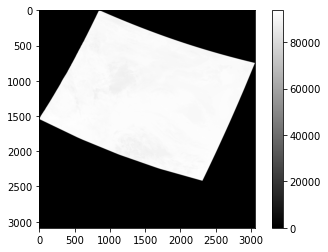

In [5]:


    

data = extract_img(image_list,tmp,dim)# convert binary files to matrix of integers
data2 = extract_img(image_list2,tmp,dim)# convert binary files to matrix of integers
newdata = np.stack([data,data2],axis = 3)
data.shape
c = plt.imshow(data[1,:,:], cmap = 'gray')

plt.colorbar(c)
#c.set_clim(1050000, 1800000)

/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0345/MYD021KM-A2019091.0345.contrail-mask
8492337
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.0845/MYD021KM-A2019091.0845.contrail-mask
7402140
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/091/A2019091.1445/MYD021KM-A2019091.1445.contrail-mask
6824020
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/093/A2019093.1445/MYD021KM-A2019093.1445.contrail-mask
6411189
/home/kjsanche/Desktop/Projects/Sat_Contrail_Unet/data/095/A2019095.1925/MYD021KM-A2019095.1925.contrail-mask
5386416


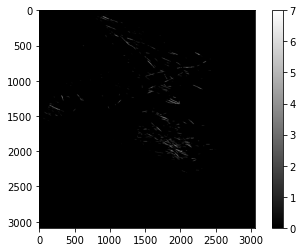

In [6]:


tmp = np.zeros((dim.shape[0],maxdim[1],maxdim[0]), dtype = int)
data3 = extract_mask(mask_list,tmp,dim)# convert binary files to matrix of integers
c = plt.imshow(data3[1,:,:], cmap = 'gray')

plt.colorbar(c)
c.set_clim(0, 7)

In [7]:
print(newdata.shape)
print(data2.shape)


(5, 3087, 3060, 2)
(5, 3087, 3060)


In [8]:
processed_data = tf.data.Dataset.from_tensor_slices((np.resize(newdata,(5,192, 192,2)), np.resize(data3,(5,192, 192))))
print(processed_data)

<TensorSliceDataset shapes: ((192, 192, 2), (192, 192)), types: (tf.int64, tf.int64)>


In [9]:

img_height = 192
img_width = 192
num_channels = 2

unet = unet_model((img_height, img_width, num_channels))
#unet.summary()
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
EPOCHS = 5


BATCH_SIZE = 2
SHUFFLE_BUFFER_SIZE = 100 # ?????

train_dataset = processed_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
#test_dataset = test_dataset.batch(BATCH_SIZE)



#print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs=EPOCHS)

Epoch 1/5
3/3 [==============================] - 2s 370ms/step - loss: 9655.9834 - accuracy: 0.4798
Epoch 2/5
3/3 [==============================] - 1s 364ms/step - loss: 11.6544 - accuracy: 0.9974
Epoch 3/5
3/3 [==============================] - 1s 369ms/step - loss: 2.9141e-04 - accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 1s 362ms/step - loss: 2.5127e-06 - accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 1s 371ms/step - loss: 1.4688e-07 - accuracy: 1.0000


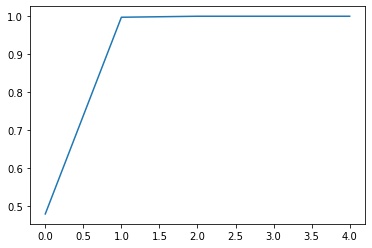

In [11]:
plt.plot(model_history.history["accuracy"])